# EDA on a Dataset with Missing Data

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load Dataset

In [2]:
# Load dataset
titanic = sns.load_dataset('titanic')

# View first few rows
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Step 3: Initial Inspection

In [3]:
# Overview of dataset
print("Dataset Info:")
print(titanic.info())

# Basic statistics
print("\nStatistical Summary:")
print(titanic.describe(include='all'))

# Check number of missing values per column
print("\nMissing Values Count:")
print(titanic.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Statistical Summary:
          survived      pclass   sex  

# Step 4: Quantify Missing Data

In [4]:
# Calculate percentage of missing values
missing_percent = titanic.isnull().mean() * 100
print("\nPercentage of Missing Values:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))



Percentage of Missing Values:
deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64


# Step 5: Visualize Missing Data

# (a) Heatmap of Missing Values

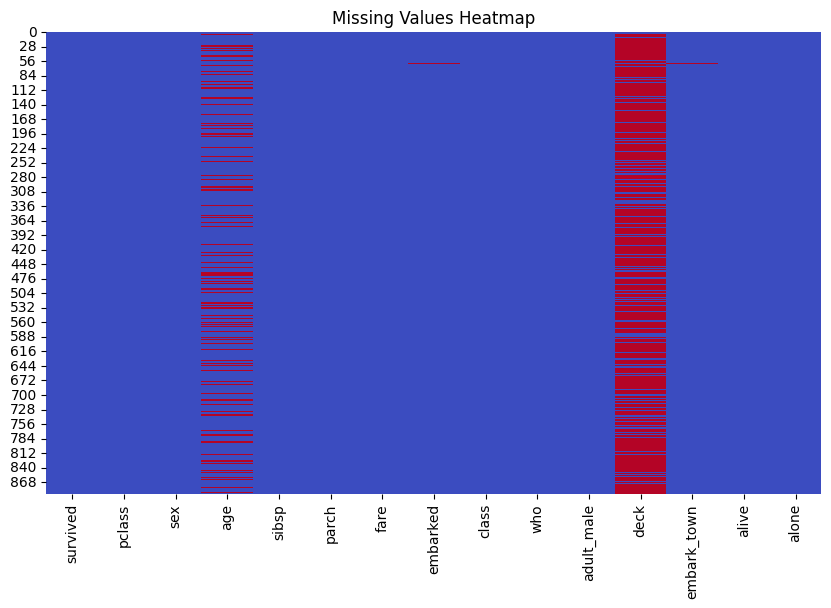

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()


# (b) Bar Plot of Missing Values

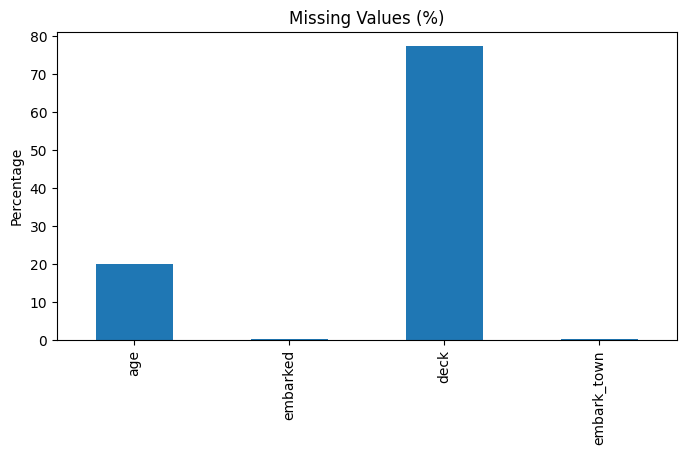

In [6]:
missing_percent[missing_percent > 0].plot(kind='bar', figsize=(8,4), title='Missing Values (%)')
plt.ylabel("Percentage")
plt.show()


# Step 6: Handle Missing Values

In [7]:
# Example handling:
# 1. Drop columns with too many missing values
titanic = titanic.drop(columns=['deck'])  # deck has ~77% missing

# 2. Fill missing age with median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# 3. Fill embarked with mode (most frequent value)
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# 4. Drop remaining rows with missing values if needed
titanic = titanic.dropna(subset=['embarked'])


# Step 7:Verify Cleaning

In [8]:
print("\nMissing Values After Cleaning:")
print(titanic.isnull().sum())



Missing Values After Cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


# Step 8: Continue with EDA (Post-Cleaning) Distribution of Numerical Features

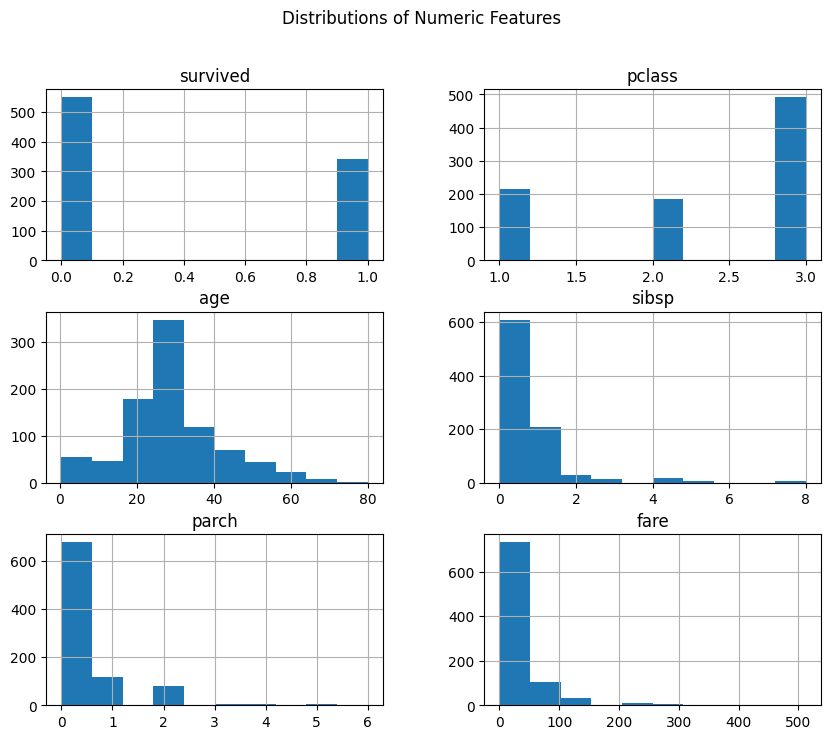

In [9]:
titanic.hist(figsize=(10,8))
plt.suptitle("Distributions of Numeric Features")
plt.show()


# Relationship between Variables

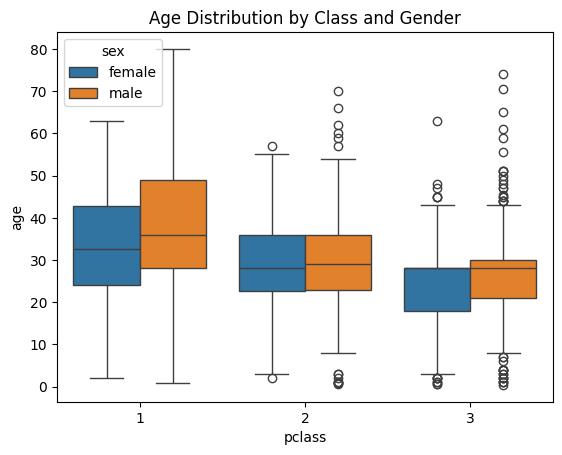

In [10]:
sns.boxplot(x='pclass', y='age', hue='sex', data=titanic)
plt.title("Age Distribution by Class and Gender")
plt.show()


# Correlation Heatmap

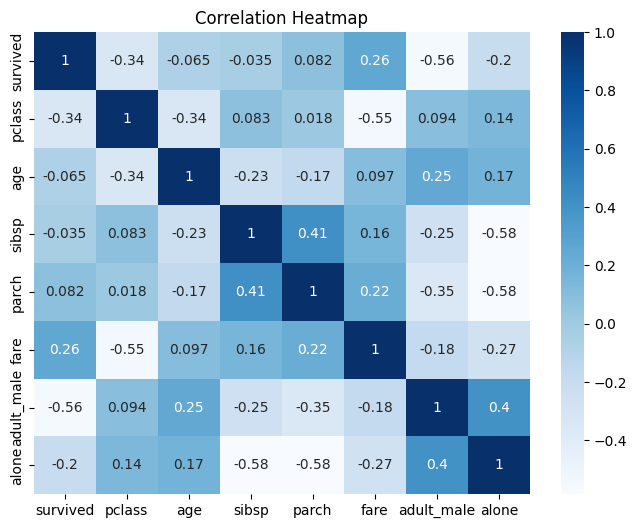

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()
